# Imports and init constants

In [1]:
!rm -r ./reduce-mode-collapse-in-gan
!git clone https://github.com/ThViviani/reduce-mode-collapse-in-gan.git

import sys; sys.path.append('./reduce-mode-collapse-in-gan')

rm: cannot remove './reduce-mode-collapse-in-gan': No such file or directory
Cloning into 'reduce-mode-collapse-in-gan'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 111 (delta 64), reused 75 (delta 31), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 573.18 KiB | 17.37 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [2]:
!pip install -r ./reduce-mode-collapse-in-gan/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import lightning as L
import torch
import torchvision
import torch.utils
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np
import torch_fidelity
import wandb

from torch.utils.data import Dataset
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch import Trainer, seed_everything

In [4]:
print(torch.__name__, torch.__version__)
print(torchvision.__name__, torchvision.__version__)
print(L.__name__, L.__version__)
print(torch_fidelity.__name__, torch_fidelity.__version__)
print(wandb.__name__, torch_fidelity.__version__)

torch 2.4.0+cu121
torchvision 0.19.0+cu121
lightning 2.4.0
torch_fidelity 0.3.0
wandb 0.3.0


In [5]:
torch.cuda.is_available()

True

In [ ]:
BACTH_SIZE = 256
LATENT_SPACE_DIM = 100
WANDB_TOKEN = '' # input your wandb token
PATH_TO_CHECKPOINT = ''
SEED = 999
MAX_EPOCHS = 20

seed_everything(SEED)

INFO: Seed set to 999


999

In [7]:
wandb.login(key=WANDB_TOKEN)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: developsviviani (developsviviani-clown-dev) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# Preparing MNIST

In [8]:
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = torchvision.datasets.MNIST('MNIST/raw/train-images-idx3-ubyte', download=True, train=True, transform=compose)
val_dataset = torchvision.datasets.MNIST('MNIST/raw/train-images-idx3-ubyte', download=True, train=False, transform=compose)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 17738720.37it/s]


Extracting MNIST/raw/train-images-idx3-ubyte/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw/train-images-idx3-ubyte/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 478536.19it/s]


Extracting MNIST/raw/train-images-idx3-ubyte/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw/train-images-idx3-ubyte/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 4474547.15it/s]


Extracting MNIST/raw/train-images-idx3-ubyte/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw/train-images-idx3-ubyte/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 7488415.40it/s]

Extracting MNIST/raw/train-images-idx3-ubyte/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw/train-images-idx3-ubyte/MNIST/raw



In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BACTH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=BACTH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Networks

In [10]:
class GeneratorCNNBlock(nn.Module):
    """Defines a generator CNN block"""

    def __init__(self, in_channels, out_channels, activation="relu", use_dropout=False, norm_layer=nn.BatchNorm2d, **kwargs):
        """Construct a generator CNN block
        Parameters:
            in_channels (int)            -- the num
        |ber of channels in the input
            out_channels (int)           -- the number of channels in the ouput when applyed this block
            activation (str)             -- the name of activation function: relu | another names
            use_dropout (bool)           -- if the flag is True then will add nn.Dropout after conv layer
            norm_layer (torch.nn)        -- normalization layer
        """

        super(GeneratorCNNBlock, self).__init__()

        kernel_size    = kwargs.get("kernel_size", 4)
        stride         = kwargs.get("stride", 2)
        padding        = kwargs.get("padding", 1)
        output_padding = kwargs.get("output_padding", 0)
        padding_mode   = kwargs.get("padding_mode", "zeros")

        use_bias = True if norm_layer == nn.InstanceNorm2d else False

        activation_module = None
        if activation == "relu":
            activation_module = nn.ReLU(inplace=True)
        elif activation == "identity":
            activation_module = nn.Identity()
        else:
            activation_module = nn.LeakyReLU(0.2)

        self.conv = nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=use_bias,
                output_padding=output_padding
            ),
            norm_layer(out_channels),
            activation_module,
        )

        if use_dropout:
            self.conv.append(nn.Dropout(0.5))

    def forward(self, x):
        return self.conv(x)


In [11]:
class BaseGenerator(nn.Module):
    def __init__(self, ngf=64, nc=1):
        super().__init__()

        self.generator = nn.Sequential(
            GeneratorCNNBlock(LATENT_SPACE_DIM, ngf * 4, kernel_size=3, stride=2, padding=0), # (ngf * 4) x 3 x 3
            GeneratorCNNBlock(ngf * 4, ngf * 2, kernel_size=3, stride=2, padding=0), # (ngf * 2) x 8 x 8
            GeneratorCNNBlock(ngf * 2, ngf, kernel_size=3, stride=2, padding=0), # (ngf * ) x 16 x 16
            nn.ConvTranspose2d(ngf, nc, 3, 2, 2, 1), # nc x 28 x 88
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(z.size(0), z.size(1), 1, 1)
        return self.generator(z)

In [12]:
class DiscriminatorCNNBlock(nn.Module):
    """Defines a discriminator CNN block"""

    def __init__(self, in_channels, out_channels, kernel_size=4, stride=2, use_dropout=False, norm_layer=nn.BatchNorm2d):
        """Construct a convolutional block.
        Parameters:
            in_channels (int)  -- the number of channels in the input
            out_channels (int) -- the number of channels in the ouput when applyed this block
            norm_layer         -- normalization layer
            stride (int)       -- the stride of conv layer
        """

        super(DiscriminatorCNNBlock, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=1, bias=False),
            norm_layer(out_channels),
            nn.LeakyReLU(0.2, inplace=True),
        )

        if use_dropout:
            self.conv.append(nn.Dropout(0.3))

    def forward(self, x):
        return self.conv(x)

In [13]:
class BaseCritic(nn.Module):
    def __init__(self, ndf=28, nc=1):
        """Construct a base Critic.
        Parameters:
            ndf (int) -- Size of feature maps in discriminator
            nc (int) -- Number of input channels.
        """
        super().__init__()

        self.critic = nn.Sequential( # 1 x 28 x 28
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False), # 28 x 14 x 14
            nn.LeakyReLU(0.2, inplace=True),
            DiscriminatorCNNBlock(ndf, ndf * 2), # 56 x 7 x 7
            DiscriminatorCNNBlock(ndf * 2, ndf * 4), # 112 x 3 x 3
            nn.Conv2d(ndf * 4, 1, 4, 2, 1, bias=False), # 1 x 1 x 1
        )

    def forward(self, x):
        return self.critic(x) # TODO: с ласт слоя можно фичи отдавать для AE, пока так оставлю

    def freeze(self):
        for param in self.parameters():
            param.requires_grad = False

    def unfreeze(self):
        for param in self.parameters():
            param.requires_grad = True

In [14]:
class EncoderMNIST(nn.Module):
    def __init__(self, x_shape, z_dim=128, dim=64, kernel_size=5, stride=2):
        super().__init__()
        in_channels = x_shape[0]

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, dim, kernel_size, stride, padding=2),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(dim, dim*2, kernel_size, stride, padding=2),
            nn.BatchNorm2d(dim*2),
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(dim*2, dim*4, kernel_size, stride, padding=2),
            nn.BatchNorm2d(dim*4),
            nn.ReLU()
        )

        # Расчет размера для полносвязного слоя
        with torch.no_grad():
            dummy = torch.zeros(1, *x_shape)
            dummy = self.conv3(self.conv2(self.conv1(dummy)))
            fc_input_dim = dummy.view(1, -1).size(1)

        self.fc = nn.Linear(fc_input_dim, z_dim)

    def forward(self, img):
        x = self.conv1(img)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)  # flatten
        return self.fc(x)

In [15]:
g = BaseGenerator().cuda()
print(g(torch.randn((BACTH_SIZE, LATENT_SPACE_DIM)).cuda()).shape)

critic = BaseCritic()
b = next(iter(train_loader))
critic(b[0]).shape

torch.Size([256, 1, 28, 28])


torch.Size([256, 1, 1, 1])

# Experiments

In [16]:
class GeneratorForFIDWrapper(nn.Module):
    """A wrapper which transforms generator's images from [-1, 1] to [0, 255] and [B, 1, H, W] -> [B, 3, H, W]"""

    def __init__(self, generator, device, img_size=299):
        super().__init__()
        self.generator = generator
        self.img_size = img_size
        self.device = device

    def forward(self, z):
        with torch.no_grad():
            imgs = self.generator(z)  # [B, 1, H, W], float32, [-1, 1]
            imgs = (imgs + 1) / 2  # [-1, 1] → [0, 1]
            imgs = imgs * 255
            imgs = imgs.clamp(0, 255).to(torch.uint8)

            if imgs.shape[1] == 1:
                imgs = imgs.repeat(1, 3, 1, 1)  # [B, 1, H, W] → [B, 3, H, W]

        return imgs

class DatasetForFIDWrapper(Dataset):
    """A dataset wrapper which returns only images (without labels)"""
    def __init__(self, dataset_class, **kwargs):
        """
            Args:
                dataset_class: Dataset class to wrap (e.g., torchvision.datasets.MNIST)
                **kwargs: All arguments required to initialize the dataset_class
        """
        self.dataset = dataset_class(**kwargs)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]
        image = (image + 1) / 2  # [-1, 1] → [0, 1]
        image = image * 255
        image = image.clamp(0, 255).to(torch.uint8) # -> [0, 255]
        if image.shape[0] == 1:
            image = image.repeat(3, 1, 1)
        return image

In [17]:
compose = transforms.Compose([
    transforms.ToTensor(),
])

ROOT_TO_REGISTER_DATASET_FOR_FID = 'test_dataset'

test_ds = torch_fidelity.register_dataset(
    ROOT_TO_REGISTER_DATASET_FOR_FID,
    lambda root, download: DatasetForFIDWrapper(torchvision.datasets.MNIST, root=root, download=download, train=False, transform=compose)
)

In [18]:
import gc

def compute_metrics(model, seed, latent_space_dim, input2, input2_root='MNIST/raw/train-images-idx3-ubyte'):
    generator = GeneratorForFIDWrapper(model.generator, model.device)
    wrapped_generator = torch_fidelity.GenerativeModelModuleWrapper(generator, latent_space_dim, 'normal', 0)
    
    metrics_dict = torch_fidelity.calculate_metrics(
        input1=wrapped_generator,
        input2=input2,
        input1_model_num_samples=10000,
        input2_model_num_samples=10000,
        cuda=True,
        isc=True,
        fid=True,
        verbose=False,
        input2_root=input2_root,
        datasets_download=True,
        rng_seed=seed,
    )
    
    print(metrics_dict)
    del generator
    del wrapped_generator
    gc.collect()
    torch.cuda.empty_cache()
    
    return metrics_dict 

In [19]:
def generate_some_examples(model, n=64):
    z = torch.randn(BACTH_SIZE, LATENT_SPACE_DIM, device=model.device)
    generated_imgs = model.generator(z).detach()

    # Create grid and display
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Generated Images")
    grid = vutils.make_grid(generated_imgs[:n], padding=2, normalize=True).cpu()
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show();

In [20]:
from trainers.neighbors_embedding_gan import NEVanilaGAN, NERpGAN
from trainers.dist_gan import DistVanilaGAN, DistRpGAN
from trainers.standard_gan import StandardGAN
from trainers.rp_gan import RpGAN
from datetime import datetime
import pandas as pd


def create_model_fn(model_class, use_encoder=False, use_r1r2=False):
    def wrapper():
        if model_class.__name__.find('Rp') != -1:
            return model_class(
                critic=BaseCritic(),
                generator=BaseGenerator(),
                encoder=EncoderMNIST((1, 28, 28), LATENT_SPACE_DIM) if use_encoder else None,
                use_r1r2_penalty=use_r1r2
            )
        else:
            return model_class(
                critic=BaseCritic(),
                generator=BaseGenerator(),
                encoder=EncoderMNIST((1, 28, 28), LATENT_SPACE_DIM) if use_encoder else None,
            )
    return wrapper


EXPERIMENTS = {
    'NEVanilaGAN': create_model_fn(NEVanilaGAN, use_encoder=True),
    'DistVanilaGAN': create_model_fn(DistVanilaGAN, use_encoder=True),
    'StandardGAN': create_model_fn(StandardGAN),
    'RpGAN': create_model_fn(RpGAN),
    'DistRpGAN': create_model_fn(DistRpGAN, use_encoder=True),
    'NERpGAN': create_model_fn(NERpGAN, use_encoder=True),
    'RpGAN_R1R2': create_model_fn(RpGAN, use_r1r2=True),
    'DistRpGAN+R1R2': create_model_fn(DistRpGAN, use_encoder=True, use_r1r2=True),
    'NERpGAN+R1R2': create_model_fn(NERpGAN, use_encoder=True, use_r1r2=True),
}

results = pd.DataFrame(columns=[
    'inception_score_mean', 
    'inception_score_std', 
    'frechet_inception_distance'
])

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs


Running NEVanilaGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_041708-1eawhbtc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run NEVanilaGAN_2025-05-22 04:17:08.195715
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/1eawhbtc
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


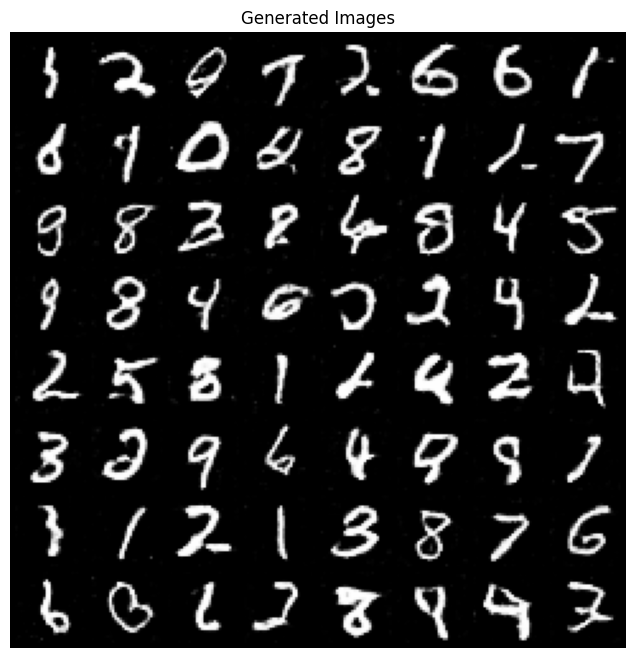

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 339MB/s]


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 17906309.61it/s]


Extracting /root/.cache/torch/fidelity_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/.cache/torch/fidelity_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 481440.37it/s]


Extracting /root/.cache/torch/fidelity_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.cache/torch/fidelity_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 4481108.16it/s]


Extracting /root/.cache/torch/fidelity_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.cache/torch/fidelity_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4688783.85it/s]

Extracting /root/.cache/torch/fidelity_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.cache/torch/fidelity_datasets/MNIST/raw



{'inception_score_mean': 2.0078572039806586, 'inception_score_std': 0.029491227080741558, 'frechet_inception_distance': 46.210314280602375}
{'inception_score_mean': 2.0078572039806586, 'inception_score_std': 0.029491227080741558, 'frechet_inception_distance': 46.210314280602375}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▂▁▁▃▂▃▃▃▆▂█▇▄█▄▄▄▁▁▅▃▃▃▄▅▇▄▄▄▅▅▆▆▃█▃▅▂▅▆
wandb:         d_grads_std ▂▃▄▄▄▂▃█▃▃▃▄▃▃▃▃▄▂▅▂▄▃▂▄▃▂▂▄▃▃▃▂▃▄▃▁▅▅▁▂
wandb:        e_grads_mean ▆█▆▆▁▄▆▅▃█▅▆▆▅▆▆▄▅▅▆▆▆▅▇▅▅▅▅▄▅▆▆▅▅▆▆▅▅▅▅
wandb:         e_grads_std ▆▆██▄▄▅▅▇▃▅▃▅▆▆▃▂▂▃▃▃▃▂▂▂▃▃▂▂▁▂▁▂▁▂▂▁▂▂▁
wandb:               epoch ▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
wandb:        g_grads_mean █▂▄▄▄▅▃▄▄▄▄▄▄▃▄▄▃▄▄▂▄▄▁▄▅▄▃▅▄▂▃▅▃▃▃▃▄▅▆▃
wandb:         g_grads_std ▅▄▁▂▃▄▄▄▂▄▃▅▄▁▄▅▅▆▄▇▃▅▅▇▆█▄▅▅▄▅▇▆▇▅█▅▇█▇
wandb:             kl_loss ▆█▅▅▅▅▅▄▄▃▄▃▄▃▂▄▃▁▄▃▁▃▃▂▃▂▂▂▃▃▂▃▃▂▂▃▃▃▂▂
wandb:             loss_ae █▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▃▄▃▅▂▅▂▄█▂▂▁▂▂▂▆▃▅▁▆▂▂▁▃▃▂▅▆▇▁▄▂▁▃▃▁▂▂▁▂
wandb:              loss_g ▂▁▂▁▆▃▁▃▂▂█▂▃▂▅▃▁▂▄▃▃▃▂▁▅▂▃▃▂▁▃▁▂▃▁▄▃▄▂▂
wandb: trainer/global_step ▁▁▁▂▂▂▂▁▂▂▃▃▃▁▁▁▄▄▄▅▅▅▅▅▅▆▁▆▆▁▁▇▇▇▇▇▁███
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.00335
wandb:

Running DistVanilaGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_042625-7b5x7qnn
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run DistVanilaGAN_2025-05-22 04:26:25.383527
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/7b5x7qnn
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


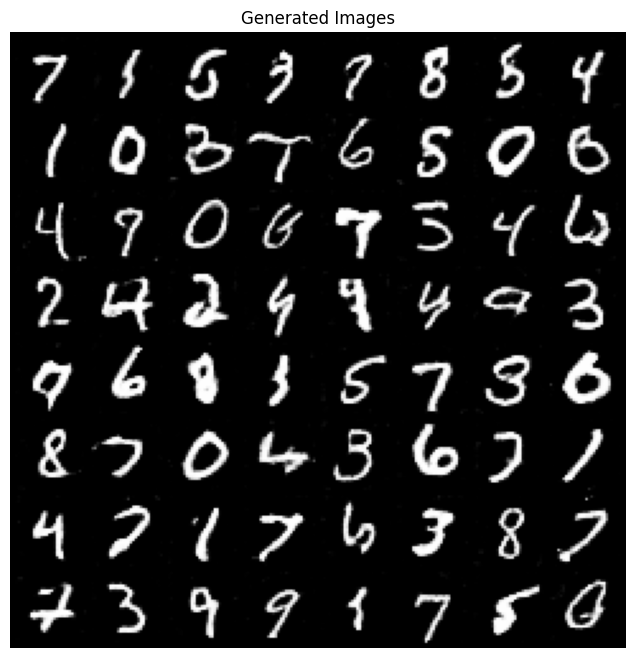

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.03431903204882, 'inception_score_std': 0.026182708798302614, 'frechet_inception_distance': 42.90613923912079}
{'inception_score_mean': 2.03431903204882, 'inception_score_std': 0.026182708798302614, 'frechet_inception_distance': 42.90613923912079}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▂▂▁▂▃▂▅▃▂▄█▂▃▅▄▁▂▅▂▃▅▅▃▄▄▄▄▄▅▃▄▅▄▇▄▁▅▇▂▆
wandb:         d_grads_std ▃▃▃▄▄▃▄▅▄▄▄▄▂▄▆▅▂▄▁▂▄▄▄▃▃▅▇▃▅▄▆▄▅█▂▅▇▄▃▅
wandb:        e_grads_mean ▄▃▅▅▄▄▄▆▂▄▄▆▄▇▅▆▄▃▅▂▄▂▁█▃▄▄▄▄▅▆▄▅▃▅▄▃▅▆▃
wandb:         e_grads_std ▄▅▇▇▃▅█▅█▃▃▆▄▂▃▃▄▂▂▃▂▂▃▂▃▂▂▂▁▁▂▂▂▂▂▁▂▂▁▁
wandb:               epoch ▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇████
wandb:        g_grads_mean ▄▄▃▂▂▄█▄▃▂▄▃▃▃▃▃▃▄▄▄▄▂▃▄▃▄▂▄▃▃▄▃▄▃▁▃▄▅▄▅
wandb:         g_grads_std ▃▃▃▁▁▂▂▃▂▂▁▃▁▃▃▃▃▄▃▃▃█▃▄▃▄▃▄▆▅▅▅▄▁▆▄▅▃▇▂
wandb:             loss_ae █▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▃▂▂█▂▅▃▂▂▄▃▃▃▂▃▄▃▅▃▄▂▃▇▃▂▂▂▄▂▂▃▃▁▄▁▃▁▃▂▂
wandb:              loss_g ▃▅▄▆▂▇▂▅▄▃▄▆▄▃▃▃▄▄▃▂▃▄▁▂▂▆▄▅▅▅▄▄▂▄▄▄▁▅▅█
wandb: trainer/global_step ▁▁▁▁▂▁▂▂▂▂▂▃▃▁▃▃▃▁▄▄▁▄▄▄▅▁▅▅▆▁▆▆▆▆▁▇████
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.00651
wandb:         d_grads_std 0.50245
wandb:        e_grads_mean -0.0
wandb: 

Running StandardGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_043619-lih7f5rw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run StandardGAN_2025-05-22 04:36:19.469221
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/lih7f5rw
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
----------------------------------------------------
728 K     Trainable params
0         Non-trainable params
728 K     Total params
2.914     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


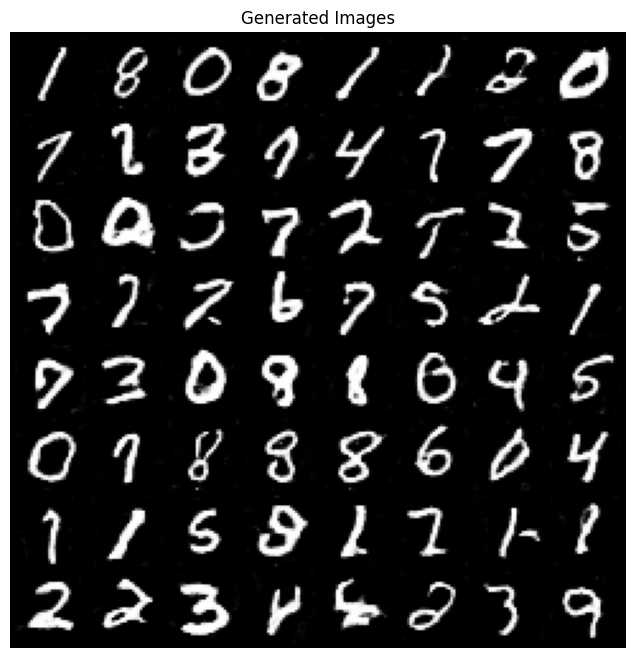

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.0974798308127682, 'inception_score_std': 0.035780914163170724, 'frechet_inception_distance': 42.99522409894743}
{'inception_score_mean': 2.0974798308127682, 'inception_score_std': 0.035780914163170724, 'frechet_inception_distance': 42.99522409894743}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▆▄▄▃▄▆▅▅▄▅▇▄▅▂▅▂▂▃▅▁▆▅▇▄▇▄▃▆▅▁█▄▄▆▅▃▆▃▆▁
wandb:         d_grads_std ▂▃▃▃▄▃▃▁▃▃▂▂▃▃▅▃▅▄▅▃▃▃▃▄▄▃▇▂▂▁▃█▂▅▃▂▅▄▄▅
wandb:               epoch ▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
wandb:        g_grads_mean █▄▃▃▂▅▂▄▄▅▅▄▅▁▅▄▅▄▃▄▅▄▃▄▄▄▄▄▅▄▃▅▄▅▄▂▅▂▅▅
wandb:         g_grads_std █▅▄▄▁▄▂▂▃▁▂▂▃▂▃▂▃▃▃▂▃▄▃▂▃▂▂▄▂▅▃▃▂▂▄▂▄▄▄▄
wandb:              loss_d ▂▆▂▁▂▆▄▃▄▄▃▄▄▄▇▅▆▄▄▄▃▃▄▄▄▃▄█▅▅▄▇▄▄▅▅▆▅▃▃
wandb:              loss_g ▃▆▄▂▂▄▄▃▅▂▂▃▃▄▃▄▃▄▄▂▂▂▂▃█▁▂▂▁▄▂▃▂▄▁▄▃▃▂▄
wandb: trainer/global_step ▁▁▁▂▂▂▂▂▃▃▃▃▃▁▃▄▁▄▄▄▅▅▅▁▅▅▅▆▁▆▇▁▇▇▇▁▇███
wandb: 
wandb: Run summary:
wandb:        d_grads_mean -0.02764
wandb:         d_grads_std 0.97109
wandb:               epoch 19
wandb:        g_grads_mean 0.00016
wandb:         g_grads_std 0.03359
wandb:              loss_d 0.60786
wandb:              loss_g 2.11769
wandb: trainer/global_step 19
wandb: 
wandb: 🚀 View run StandardGAN_2025

Running RpGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_044007-d4tqnjtz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run RpGAN_2025-05-22 04:40:07.360057
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/d4tqnjtz
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
----------------------------------------------------
728 K     Trainable params
0         Non-trainable params
728 K     Total params
2.914     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


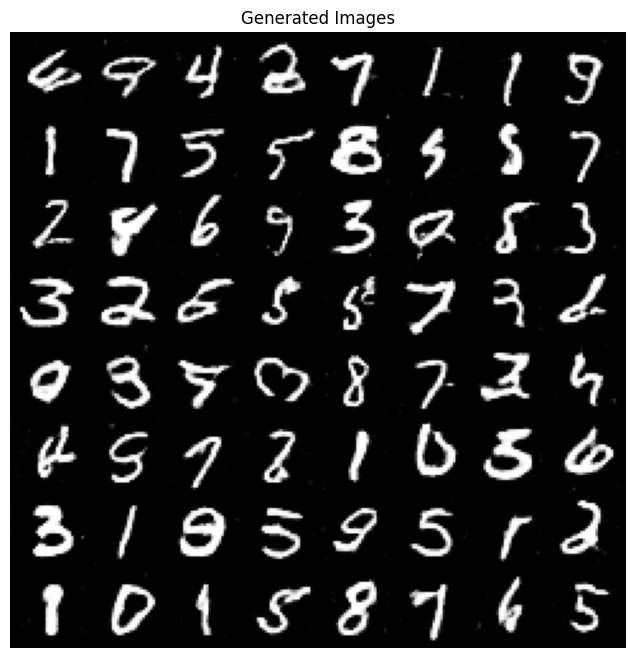

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.140899943982021, 'inception_score_std': 0.02228610429119876, 'frechet_inception_distance': 34.46771449827247}
{'inception_score_mean': 2.140899943982021, 'inception_score_std': 0.02228610429119876, 'frechet_inception_distance': 34.46771449827247}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▄▄▄▄▅▅▄▅▄▄▇▆▂▆▂▄▅▄█▅▂▄▃▁▄▄▅▄▆▄▂▅▆▅▄▄▄▂▄▅
wandb:         d_grads_std ▂▂▃▂▃▂▄█▃▃▂▅▅█▅▆▁▂▄▄▃▃█▄▂▃▆▅▂▁▁▃▃▃▄▄▃▄▁▁
wandb:               epoch ▁▁▁▂▂▂▂▂▂▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇█████
wandb:        g_grads_mean ▄▄▄▅▅▄▅▄▄▆▄▆▄▅▅▆▄▃▄▂▅▅▅▅▃▄▄▄▄▄▅▆▄▄▁▄█▃▄▄
wandb:         g_grads_std ▁▁▁▃▃▃▂▃▃▃▄▄▃▄▅▆▅▅▅▃▅▄▅▂▂▅▅▆▅▇█▇▅▆▇▅▆██▂
wandb:              loss_d ▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▄▂▂▂▂▁▁▁▁▁▁▁▁█
wandb:              loss_g ▅▆▆▇█▇▅▅▄▆▅▅▅▅▅▅▅▆▄▅▅▄▅▆▄▂▃▃▄▅▄▄▆▆▅▄▄▅▅▁
wandb: trainer/global_step ▁▂▂▂▂▁▃▃▃▃▄▄▁▄▁▅▁▅▅▅▅▅▁▅▆▁▆▆▇▇▇▇▁▇▇████▁
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.0033
wandb:         d_grads_std 0.12835
wandb:               epoch 19
wandb:        g_grads_mean 0.00021
wandb:         g_grads_std 0.02989
wandb:              loss_d 0.37667
wandb:              loss_g 2.54646
wandb: trainer/global_step 19
wandb: 
wandb: 🚀 View run RpGAN_2025-05-22 0

Running DistRpGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_044405-cm7jlfuw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run DistRpGAN_2025-05-22 04:44:05.621210
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/cm7jlfuw
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


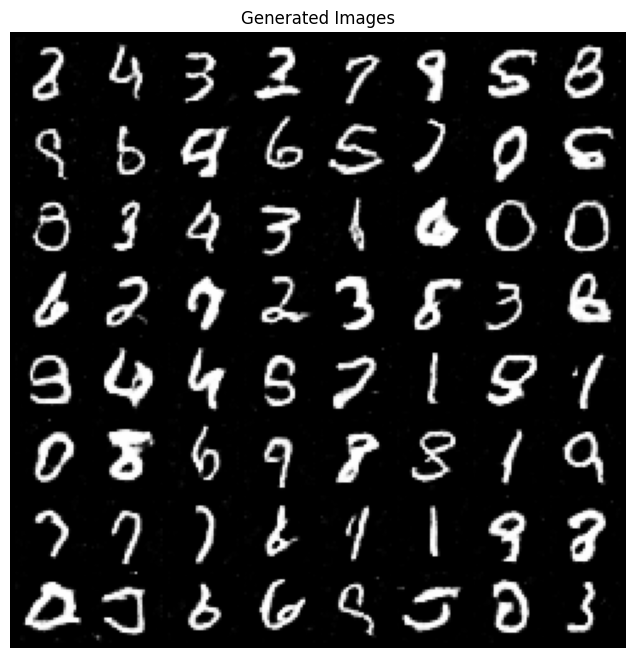

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 1.9700596205521745, 'inception_score_std': 0.018292422252531804, 'frechet_inception_distance': 49.20962714321794}
{'inception_score_mean': 1.9700596205521745, 'inception_score_std': 0.018292422252531804, 'frechet_inception_distance': 49.20962714321794}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▆▆▅▅▆█▆▅▆▅▅▄▆▆▅▁▃▆▆▅▆▆▆▅▇▇▅▆▃▆▇▆█▆▆▄▇▂▅▆
wandb:         d_grads_std ▁▄▄▃▃█▃▃▂▂▂▃▃▂▄▄▃▄▄▃▅▁▃▃▄▅▆▂▅▄▃▂▂▂▅▅▃▃▄▆
wandb:        e_grads_mean █▇▁▆▆█▅▆▇▆▆▆▆▇▇█▆█▇█▇▇▇▇▇▇▆▇▇▆▇▇▇▇▇▆▇▇█▇
wandb:         e_grads_std ▂▇█▅▃▆▃▄▅▃▃▂▂▂▂▂▃▂▂▂▂▂▂▂▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁
wandb:               epoch ▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇██
wandb:        g_grads_mean ▄▃▄▄▃▅▄▂▅▅▄▄▃▂▃▄▅▄▄▅▄▄▇▄▄▆▂▇▄▃█▂▁▁▆▅▄▄▆▅
wandb:         g_grads_std ▁▂▂▂▂▂▃▂▃▃▄▄▄▄▄▄▅▃▄▅▂▄▄█▅▅▅▅▆▆▄▅▅▂▃▅▅▅▆▃
wandb:             loss_ae █▅▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▁▃▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁
wandb:              loss_g ▇▂▅▅▆▅▆▆▄▆▆▇▇▇▅▇▇▆▁▇▇▆█▅▆▇▆▆▆█▆▂▅▆▆▆█▅▅█
wandb: trainer/global_step ▁▁▂▂▂▂▂▃▃▃▃▁▃▃▁▄▄▄▁▅▁▅▅▅▅▆▆▆▁▆▁▇▇▇▁▇▇██▁
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.00111
wandb:         d_grads_std 0.5998
wandb:        e_grads_mean 0.0
wandb:   

Running NERpGAN


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_045414-upvvxlxw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run NERpGAN_2025-05-22 04:54:14.088824
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/upvvxlxw
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


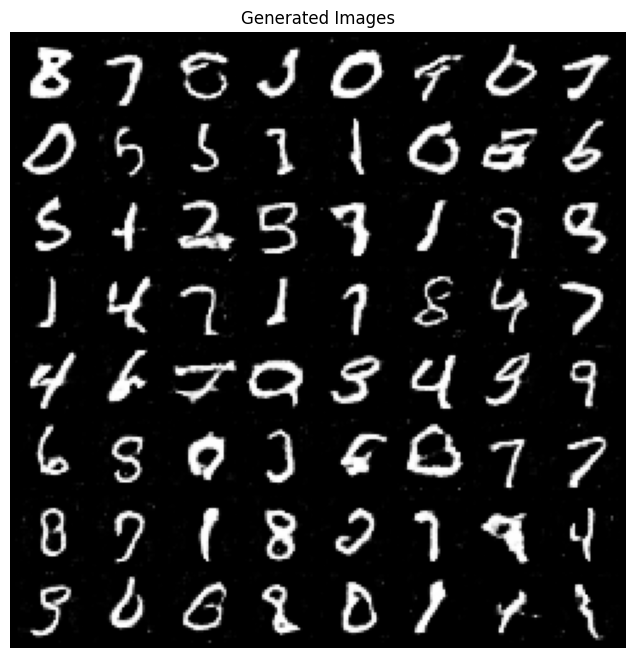

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 1.9905283431099619, 'inception_score_std': 0.026511876550554595, 'frechet_inception_distance': 52.190699621862564}
{'inception_score_mean': 1.9905283431099619, 'inception_score_std': 0.026511876550554595, 'frechet_inception_distance': 52.190699621862564}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▅▄▄▃▆▂▇▂▆▄▅▁▃▃▃▅▅▄▆▅▃▆▇▆▆▂▅▅▅▄▃▃▇▄▄▆█▂▃▆
wandb:         d_grads_std ▁▁▂▂▂▂▂▆▂▂▃▃▂▂▂▄▃▃▆▂▂▃▃▃▃▅▃▄▅▂▄▄▅▃▅▇▇▅█▅
wandb:        e_grads_mean ▁▅▇█▄█▅▄▅▃▆▅▇▆▃▅▇▄▅▆▇▅▅▅▅▅▇▅▅▆▅▆▅▆▅▄▅▅▅▆
wandb:         e_grads_std █▇▃▅▄▃▃▂▃▂▂▂▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▂▂▁▁▁▁▁▂▂▂
wandb:               epoch ▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇███
wandb:        g_grads_mean ▄▂▄▂▃▅▄▃▄▃▃▃▄▃▄▂▃▄▅▄▅▄▃▂▃▆▃▆▃▁▄▃▄▃▄▄▂▄█▅
wandb:         g_grads_std ▁▃▂▂▃▃▃▄▄▄▄▃▄▇▁▅▅▅▅█▆▃▅▅▅▅▃▄▄▄▅▆▆▆▄▅▆▆▇▃
wandb:             kl_loss █▆▆▆▄▇▆▅▇▄▅▅▄▅▃▄▃▅▃▃▅▄▂▃▃▂▃▃▃▃▄▃▃▂▁▃▃▄▃▁
wandb:             loss_ae █▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▃▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▂▁▁▁▁▁▁▁
wandb:              loss_g ▂▃▄▅▃▆▅▅▄▆▅▆▅▅▆▅▆▆▇▇▃▄▆▆▇▁▄▆▆▇▅▆▇▃▆▆▆█▆▄
wandb: trainer/global_step ▁▁▂▂▂▁▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▁▅▁▆▁▆▆▆▁▁▇▇▇▇▇█▁██
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.00666
wandb:

Running RpGAN_R1R2


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_050325-mfc5et24
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run RpGAN_R1R2_2025-05-22 05:03:25.166778
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/mfc5et24
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
----------------------------------------------------
728 K     Trainable params
0         Non-trainable params
728 K     Total params
2.914     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


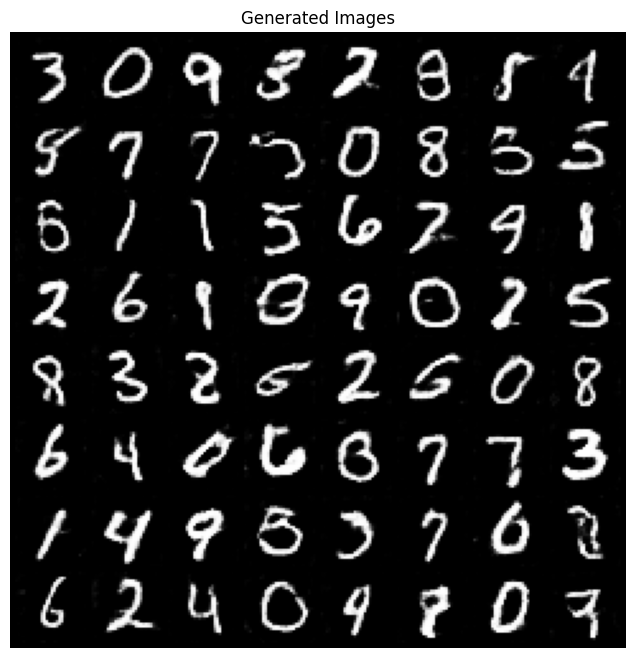

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.130667782057339, 'inception_score_std': 0.029335442529901317, 'frechet_inception_distance': 36.65204759628719}
{'inception_score_mean': 2.130667782057339, 'inception_score_std': 0.029335442529901317, 'frechet_inception_distance': 36.65204759628719}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean ▆█▄▂▂▂▂▂▂▁▂▂▂▁▂▂▂▂▂▂▂▁▂▂▁▂▁▂▁▂▂▁▁▂▁▂▁▁▂▂
wandb:         d_grads_std █▂▂▂▃▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:               epoch ▁▁▁▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█████
wandb:        g_grads_mean █▃▃▃▃▁▁▂▄▁▃▁▃▄▄▂▃▄▃▃▃▃▂▃▃▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃
wandb:         g_grads_std █▃▁▇▄▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▁▁▁▂▃
wandb:              loss_d ▃▁▁▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█▇███████████████████
wandb:              loss_g ▇█▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: trainer/global_step ▁▁▂▂▂▂▂▃▃▃▁▃▄▄▁▄▁▄▄▅▁▅▅▅▁▆▁▆▇▇▇▇▇▇▇▁████
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 8e-05
wandb:         d_grads_std 0.00563
wandb:               epoch 19
wandb:        g_grads_mean -0.0
wandb:         g_grads_std 0.00143
wandb:              loss_d 0.65534
wandb:              loss_g 0.79877
wandb: trainer/global_step 19
wandb: 
wandb: 🚀 View run RpGAN_R1R2_2025-05-22 

Running DistRpGAN+R1R2


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_051102-ii4v2arz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run DistRpGAN+R1R2_2025-05-22 05:11:01.972254
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/ii4v2arz
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


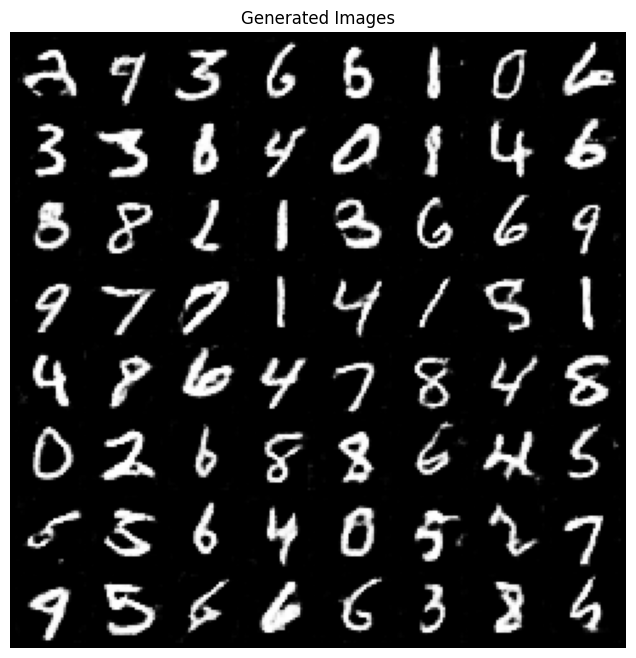

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.0999767793200648, 'inception_score_std': 0.028592461021957984, 'frechet_inception_distance': 35.82857454065925}
{'inception_score_mean': 2.0999767793200648, 'inception_score_std': 0.028592461021957984, 'frechet_inception_distance': 35.82857454065925}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean █▅▃▄█▁▃▃▄▁▃▁▄▂▄▃▅▂▂▂▂▃▃▃▃▄▃▂▃▃▂▃▃▃▃▃▃▃▃▃
wandb:         d_grads_std █▇██▅▆▅▅▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▂▂▁▂▂▁▂▁▁▁▁▁
wandb:        e_grads_mean ▄▄▂▄▇▇▇▂▅▆▄█▃▇▃▄▃▄▄▅▄▆▄▅▃▃▁▁▄▃▆▆▃▃▄▇▇▅▅▄
wandb:         e_grads_std █▆▄▆▄▄▄▄▃▂▃▅▃▃▂▁▃▂▃▂▂▂▂▂▁▂▁▂▂▂▁▁▂▂▁▂▃▁▁▁
wandb:               epoch ▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█████
wandb:        g_grads_mean ▆▁▆▆▆▄▇▅▃▄█▇▅▃▇▆▄▅▅▄▄▃▅▄▅▄▅▄▅▅▄▄▄▅▅▅▅▃▄▄
wandb:         g_grads_std █▄▄▃▄▃▃▃▃▃▃▂▃▃▃▂▂▃▂▂▂▂▂▂▂▂▁▁▂▂▂▁▁▁▁▂▁▁▁▂
wandb:             loss_ae █▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▅▁▂▃▄▄▄▄▄▅▄▆▅▆▆▆▇▅▇▆▇▆▆▆▆▆▇▆▇▆█▇██▇▇▇▇█▇
wandb:              loss_g █▅▆█▇▆▆▇▅▅▆▅▅▅▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂
wandb: trainer/global_step ▁▁▁▁▂▂▂▂▂▃▃▁▃▃▃▃▃▃▄▄▁▄▄▄▅▅▁▆▁▆▆▆▆▇▁▇▇▇██
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 7e-05
wandb:         d_grads_std 0.00588
wandb:        e_grads_mean -0.0
wandb:   

Running NERpGAN+R1R2


wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250522_052431-7lstqo8j
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run NERpGAN+R1R2_2025-05-22 05:24:31.028657
wandb: ⭐️ View project at https://wandb.ai/developsviviani-clown-dev/Experiments
wandb: 🚀 View run at https://wandb.ai/developsviviani-clown-dev/Experiments/runs/7lstqo8j
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params | Mode 
----------------------------------------------------
0 | critic    | BaseCritic    | 128 K  | train
1 | generator | BaseGenerator | 600 K  | train
2 | encoder   | EncoderMNIST  | 1.4 M  | train
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.660     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


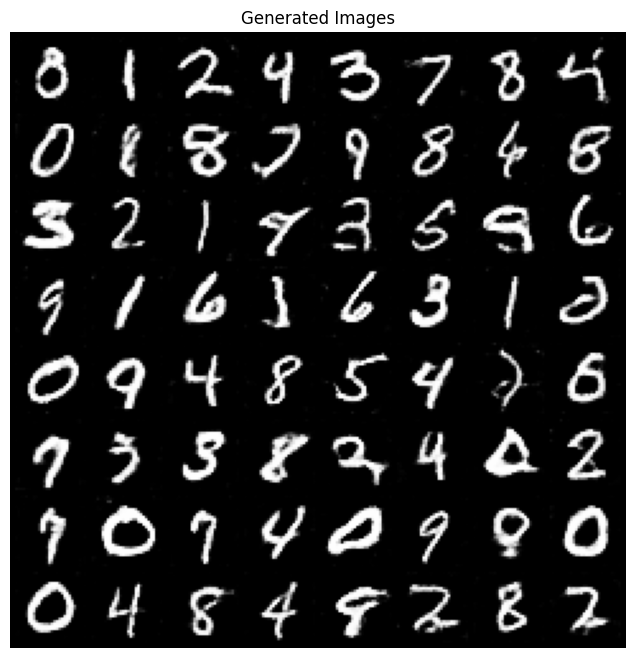

/usr/local/lib/python3.11/dist-packages/torch_fidelity/utils.py:328: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  out[n] = torch.load(p, map_location='cpu')
/usr/local/lib/

{'inception_score_mean': 2.120124983458317, 'inception_score_std': 0.01987313210842194, 'frechet_inception_distance': 35.99968632401445}
{'inception_score_mean': 2.120124983458317, 'inception_score_std': 0.01987313210842194, 'frechet_inception_distance': 35.99968632401445}


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:        d_grads_mean █▇▂▁▁▂▄▂▃▁▃▂▂▄▃▃▃▃▂▃▃▅▃▄▃▄▃▃▃▃▃▂▃▃▃▃▃▃▃▃
wandb:         d_grads_std ▇▇█▃▃▄▃▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:        e_grads_mean ▂▆█▁▅▂▄▅▄▅▄▃▄▅▃▃▅▄▄▄▄▃▃▃▄▄▄▄▃▃▃▄▄▃▃▄▄▃▄▄
wandb:         e_grads_std ▇▃▄▃█▄▆▃▃▂▃▃▃▂▃▂▂▃▂▂▂▂▃▁▂▂▂▂▃▂▁▂▁▁▁▂▂▁▁▁
wandb:               epoch ▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇█
wandb:        g_grads_mean ▄▂▄▁▁▁▅▂█▇▆▃▁▅▅▃▇▂█▅▄▆▅▄▅▆▆▃▃▅▅▄▄▄▄▄▄▄▂▄
wandb:         g_grads_std █▂▁▁▂▃▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂
wandb:             kl_loss ▁█▇▅▄▄▅▄▄▃▄▄▄▄▃▃▄▄▃▅▃▄▄▄▃▃▄▃▄▃▃▄▃▃▃▃▄▃▃▃
wandb:             loss_ae █▅▃▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:              loss_d ▃▂▁▁▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇█████████████████
wandb:              loss_g ▄▆▇█▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: trainer/global_step ▁▁▁▁▂▂▁▂▂▃▃▃▁▃▁▄▁▄▄▁▄▄▄▅▅▅▆▁▆▆▆▇▇▇▇█████
wandb: 
wandb: Run summary:
wandb:        d_grads_mean 0.0
wandb:    

In [21]:
for name, model_fn in EXPERIMENTS.items():
    print(f"Running {name}")

    wandb_logger = WandbLogger(
        project='Experiments',
        save_dir='',
        log_model=True,
        name=name + "_" + str(datetime.now())
    )

    trainer = L.Trainer(
        max_epochs=MAX_EPOCHS,
        logger=wandb_logger,
        deterministic=True
    )

    model = model_fn()

    trainer.fit(model=model, train_dataloaders=train_loader)

    generate_some_examples(model)

    metrics = compute_metrics(model, seed=SEED, latent_space_dim=LATENT_SPACE_DIM, input2=ROOT_TO_REGISTER_DATASET_FOR_FID)
    print(metrics)

    results.loc[name] = metrics

    wandb.finish()
    
    # Чистим память
    del model
    del trainer
    del wandb_logger
    gc.collect()
    torch.cuda.empty_cache()

## Results

In [22]:
results

,inception_score_mean,inception_score_std,frechet_inception_distance
NEVanilaGAN,2.007857,0.029491,46.210314
DistVanilaGAN,2.034319,0.026183,42.906139
StandardGAN,2.097480,0.035781,42.995224
RpGAN,2.140900,0.022286,34.467714
DistRpGAN,1.970060,0.018292,49.209627
NERpGAN,1.990528,0.026512,52.190700
RpGAN_R1R2,2.130668,0.029335,36.652048
DistRpGAN+R1R2,2.099977,0.028592,35.828575
NERpGAN+R1R2,2.120125,0.019873,35.999686
